<a href="https://colab.research.google.com/github/Apoorvdhavalikar27/Learning_With_Torch/blob/main/G_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import models,transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [3]:
alexnet = models.AlexNet()

Create ResNet Object

In [4]:
resnet = models.resnet101(pretrained = True)

In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Define preprocess,transformd to convert image to tensors

In [6]:
preprocess = transforms.Compose([
     transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(
         mean = [0.485,0.456,0.406],
         std = [0.229,0.224,0.225]
     )
  ])

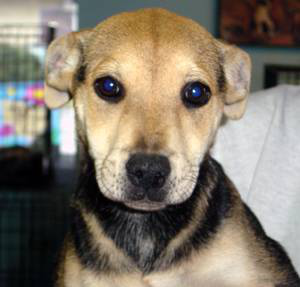

In [7]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/DataSets/dog.4.jpg')
img

Lets Preprocess input image

In [8]:
img_t = preprocess(img)
img_t

tensor([[[ 1.8037,  1.8037,  1.8037,  ..., -1.2959, -1.2274, -1.1932],
         [ 1.8722,  1.8722,  1.8722,  ..., -1.3302, -1.3473, -1.2959],
         [ 1.8550,  1.8550,  1.8550,  ..., -1.2959, -1.3815, -1.3644],
         ...,
         [-1.9980, -1.9467, -1.9295,  ..., -0.4739, -0.6281, -0.7993],
         [-2.0152, -1.9638, -1.9467,  ..., -0.3198, -0.5253, -0.6965],
         [-2.0323, -1.9809, -1.9638,  ..., -0.2171, -0.4226, -0.6109]],

        [[ 1.8508,  1.8508,  1.8508,  ..., -1.7556, -1.7206, -1.6856],
         [ 1.9734,  1.9734,  1.9734,  ..., -1.7556, -1.8081, -1.7731],
         [ 1.9909,  1.9909,  1.9909,  ..., -1.7206, -1.8081, -1.8081],
         ...,
         [-1.8431, -1.7906, -1.7731,  ..., -0.7052, -0.8102, -0.9328],
         [-1.8606, -1.8081, -1.7906,  ..., -0.5476, -0.7227, -0.8627],
         [-1.8782, -1.8256, -1.8081,  ..., -0.4426, -0.6176, -0.7577]],

        [[ 1.7337,  1.7337,  1.7337,  ..., -1.4733, -1.4907, -1.4907],
         [ 1.8208,  1.8208,  1.8208,  ..., -1

In [9]:
batch_t = torch.unsqueeze(img_t, 0)

In [10]:
batch_t

tensor([[[[ 1.8037,  1.8037,  1.8037,  ..., -1.2959, -1.2274, -1.1932],
          [ 1.8722,  1.8722,  1.8722,  ..., -1.3302, -1.3473, -1.2959],
          [ 1.8550,  1.8550,  1.8550,  ..., -1.2959, -1.3815, -1.3644],
          ...,
          [-1.9980, -1.9467, -1.9295,  ..., -0.4739, -0.6281, -0.7993],
          [-2.0152, -1.9638, -1.9467,  ..., -0.3198, -0.5253, -0.6965],
          [-2.0323, -1.9809, -1.9638,  ..., -0.2171, -0.4226, -0.6109]],

         [[ 1.8508,  1.8508,  1.8508,  ..., -1.7556, -1.7206, -1.6856],
          [ 1.9734,  1.9734,  1.9734,  ..., -1.7556, -1.8081, -1.7731],
          [ 1.9909,  1.9909,  1.9909,  ..., -1.7206, -1.8081, -1.8081],
          ...,
          [-1.8431, -1.7906, -1.7731,  ..., -0.7052, -0.8102, -0.9328],
          [-1.8606, -1.8081, -1.7906,  ..., -0.5476, -0.7227, -0.8627],
          [-1.8782, -1.8256, -1.8081,  ..., -0.4426, -0.6176, -0.7577]],

         [[ 1.7337,  1.7337,  1.7337,  ..., -1.4733, -1.4907, -1.4907],
          [ 1.8208,  1.8208,  

Activate ResNet before Prediction

In [11]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

This is our output with 1000 probabilities with respective classes

In [12]:
out = resnet(batch_t)
out

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[-2.2563e-01, -5.5508e-01, -1.1641e+00, -1.3976e+00, -2.8673e+00,
          7.9022e-01, -2.6190e+00, -2.0641e+00, -1.7005e+00, -3.3859e+00,
          9.3209e-01, -5.6517e-01, -2.0349e+00, -1.3654e+00, -2.1478e+00,
         -3.3301e+00, -2.9935e+00, -1.7439e+00, -1.9983e+00, -2.8796e+00,
         -2.3346e+00, -3.1967e+00, -4.0660e+00, -1.9613e+00, -3.6870e+00,
         -1.0628e+00, -5.0741e-01, -1.8404e+00, -2.7544e-01, -3.5636e-01,
         -1.7563e+00, -1.4935e+00,  2.4154e-01, -1.2143e+00, -8.2584e-01,
         -3.2272e-01,  1.0523e-01, -1.5891e+00,  5.2379e-01, -2.8908e+00,
         -1.2459e+00, -1.2889e-01,  6.7907e-01, -5.2151e-01, -1.3709e+00,
         -2.6923e-01, -8.5412e-01, -1.8610e-01, -2.5375e+00, -3.2725e+00,
         -2.9576e+00, -2.3286e-01, -8.0288e-01, -1.0954e+00, -7.3948e-01,
         -1.7743e+00, -1.2720e-01, -1.4661e+00, -2.6428e+00, -1.9506e-01,
          1.5211e+00,  7.7614e-01,  1.0899e+00,  1.4920e+00,  2.5634e-02,
         -3.7632e-01,  9.6254e-01,  1.

Class with highest Probability

In [13]:
torch.argmax(out)

tensor(180)

In [14]:
value,index = torch.max(out, 1)

In [15]:
value,index

(tensor([7.9876], grad_fn=<MaxBackward0>), tensor([180]))

Let's Check the respective label in Resnet labels file

In [16]:
with open('/content/drive/MyDrive/DataSets/imagenet1000_clsidx_to_labels.txt') as f:
  labels = [line.strip() for line in f.readlines()]


In [17]:
percentage = F.softmax(out , dim=1)[0]*100
labels[index[0]],percentage[index[0]].item()

("180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',",
 15.58975601196289)

In [18]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',",
  15.58975601196289),
 ("273: 'dingo, warrigal, warragal, Canis dingo',", 12.779728889465332),
 ("208: 'Labrador retriever',", 8.075196266174316),
 ("151: 'Chihuahua',", 8.052091598510742),
 ("227: 'kelpie',", 7.884716033935547)]